In [5]:
"""
Created on Thu Oct 24 14:21:39 2013

@author: Stefan Auer, Chair of Remote Sensing Technology, TUM, 2013

Tutorial: SAR-Focusing 
"""

# import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
import math as math
from matplotlib import cm

# --------------------------------------------------

In [10]:
# A.) Load raw data

# Dummy image ('Test_Image')
data = spio.loadmat('Test_Image.mat')
Raw_data = data['Test_Image']
max_power = 2.1807e+008

# Real SAR data ('ERS')
#data = spio.loadmat('ERS.mat')
#Raw_data = data['raw']
#max_power = 10000

In [11]:
# Multilooking on/off?
multilook = 0  # 0: no; 1: yes
ml_factor = 5  # multilooking factor (spatial)

In [13]:
# Get image size
size_azimuth = Raw_data.shape[0]
size_range = Raw_data.shape[1]

In [14]:
# --------------------------------------------------

# B.) Sensor parameters (ERS satellite)
fs = 18.962468*10**6         # Range Sampling Frequency [Hz]
K_r = 4.18989015*10**11      # FM Rate Range Chirp [1/s^2] --> up-chirp
tau_p = 37.12*10**(-6)       # Chirp duration [s]
V = 7098.0194                # Effective satellite velocity [m/s]
Lambda = 0.05656             # Length of carrier wave [m]
R_0 = 852358.15              # Range to center of antenna footprint [m]
ta = 0.6                     # Aperture time [s]
prf = 1679.902               # Pulse Repitition Frequency [Hz]

# --------------------------------------------------

[]

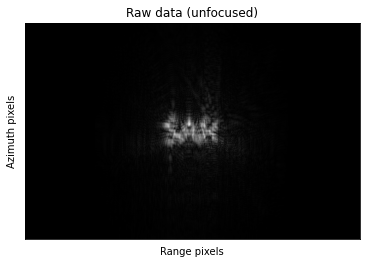

In [15]:
# C.) Display raw data
Raw_data_abs = abs(Raw_data)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(Raw_data_abs, aspect='equal', cmap=cm.gray)
ax.set_title('Raw data (unfocused)')
ax.set_xlabel('Range pixels')
ax.set_ylabel('Azimuth pixels')
ax.set_xticks([])
ax.set_yticks([])

In [16]:
# --------------------------------------------------

# RANGE DOMAIN

# D.) Define correlation chirp in range

# Basic definitions
range_chirp = np.zeros((1, size_range), 'complex')  # empty vector to be filled with chirp values
tau = np.arange(-tau_p/2, tau_p/2, 1/fs)  # time axis in range
omega = np.arange(-fs/2, fs/2, 1/tau_p)  # frequency axis in range

In [18]:
# Define chirp in range    
phase = 1j*math.pi*K_r*tau**2
ra_chirp_temp = np.exp(phase)

In [20]:
# Get size of chirp
size_chirp_r = len(tau)

In [21]:
size_chirp_r

704

Text(0, 0.5, 'Amplitude')

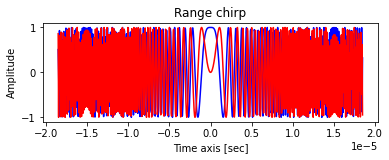

In [22]:
# Display range chirp (time + frequency domain)
# Time domain
fig = plt.figure()
ax2 = fig.add_subplot(2, 1, 1)
ax2.plot(tau, ra_chirp_temp.real, 'b')
ax2.plot(tau, ra_chirp_temp.imag, 'r')
ax2.set_title('Range chirp')
ax2.set_xlabel('Time axis [sec]')
ax2.set_ylabel('Amplitude')

In [ ]:
# Time domain
fig = plt.figure()
ax2 = fig.add_subplot(2, 1, 1)
ax2.plot(tau, ra_chirp_temp.real, 'b')
ax2.plot(tau, ra_chirp_temp.imag, 'r')
ax2.set_title('Range chirp')
ax2.set_xlabel('Time axis [sec]')
ax2.set_ylabel('Amplitude')

In [23]:
# Frequency domain
Spectrum_temp = abs(np.fft.fftshift(np.fft.fft(ra_chirp_temp)))    # Fourier transform
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(omega, Spectrum_temp)
ax3.set_title('Spectrum of range chirp')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Absolute value')

Text(0, 0.5, 'Absolute value')

In [42]:
# Position chirp in range vector (centered)
# --> used for correlation procedure
index_start = int(np.ceil((size_range-size_chirp_r)/2)-1)
index_end = int(size_chirp_r+np.ceil((size_range-size_chirp_r)/2)-2)
range_chirp [0, index_start:index_end +1] = ra_chirp_temp

In [43]:
# Transform vector in frequency domain (Fourier transform)
RANGE_CHIRP = np.fft.fft(range_chirp)

In [44]:
# Define chirp for correlation 
# --> conjugate complex of signal chirp
CON_RANGE_CHIRP = np.conjugate(RANGE_CHIRP)

In [ ]:
# --------------------------------------------------

# AZIMUTH DOMAIN

# E.) Define correlation chirp in azimuth

In [33]:
# Basic definitions
azimuth_chirp = np.zeros((1, size_azimuth), 'complex')  # empty vector to be filled with chirp values
t = np.arange(-ta/2, ta/2, 1/prf)  # time axis in azimuth
v = np.arange(-prf/2, prf/2, 1/ta)  # frequency axis in azimuth

In [35]:
# FM Rate Azimuth Chirp
K_a = (-2*V**2)/(Lambda*R_0)

In [36]:
# Define chirp in azimuth
phase2 = 1j*math.pi*K_a*t**2
az_chirp_temp = np.exp(phase2)

In [37]:
# Get size of chirp
size_chirp_a = len(t)

In [ ]:
# Display azimuth chirp (time + frequency domain)

# assume: name of chirp = az_chirp_temp

Text(0, 0.5, 'Amplitude')

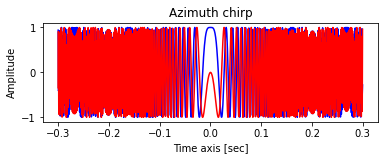

In [38]:
# Time domain
fig = plt.figure()
ax4 = fig.add_subplot(2, 1, 1)
ax4.plot(t, az_chirp_temp.real, 'b')
ax4.plot(t, az_chirp_temp.imag, 'r')
ax4.set_title('Azimuth chirp')
ax4.set_xlabel('Time axis [sec]')
ax4.set_ylabel('Amplitude')

In [39]:
# Frequency domain
Spectrum_temp2 = abs(np.fft.fftshift(np.fft.fft(az_chirp_temp)))  # Fourier transform
ax5 = fig.add_subplot(2, 1, 2)
ax5.plot(v, Spectrum_temp2)
ax5.set_title('Spectrum of azimuth chirp')
ax5.set_xlabel('Frequency [Hz]')
ax5.set_ylabel('Absolute value')

Text(0, 0.5, 'Absolute value')

In [41]:
# Position chirp in azimuth vector (centered)
# --> used for correlation procedure
index_start2 = int(np.ceil((size_azimuth-size_chirp_a)/2)-1)
index_end2 = int(size_chirp_a+np.ceil((size_azimuth-size_chirp_a)/2)-2)
azimuth_chirp[0, index_start2:index_end2+1] = az_chirp_temp

In [45]:
# Transform vector in frequency domain (Fourier transform)
AZIMUTH_CHIRP = np.fft.fft(azimuth_chirp)

In [46]:
# Define chirp for correlation 
# --> conjugate complex of signal chirp
CON_AZIMUTH_CHIRP = np.conjugate(AZIMUTH_CHIRP)

In [ ]:
# --------------------------------------------------

# F.) Focusing (= 2D correlation)

In [47]:
# Dummy matrix to be filled with processed data
processed = np.zeros((size_azimuth, size_range), 'complex')

In [49]:
# F.1) Range compression
# --> correction in azimuth time - range frequency domain
# --> result in azimuth-range domain
for k1 in range(0, size_azimuth, 1):
    vek = Raw_data[k1, :]  # Select row in range
    VEK = np.fft.fft(vek)  # Fourier Transform
    CORR = VEK*CON_RANGE_CHIRP  # Multiply vectors
    if_vek = np.fft.ifft(CORR)  # Inverse Fourier Transform
    if_vek_sort = np.fft.ifftshift(if_vek)  # Sorting after FFT
    processed[k1, :] = if_vek_sort  # Store row in matrix

In [50]:
# Proceeding:
# A.) Take 1st range line and fourier transform it
# B.) Multiply it with correlation chirp in frequency domain
# C.) Inverse fourier transform
# D.) Take next range line and continue...


# F.2) Azimuth compression 
# conducted in azimuth frequency - range time domain 

for k2 in range(0, size_range, 1):
    vek2 = processed[:, k2]  # Select row in azimuth
    VEK2 = np.fft.fft(vek2)
    CORR2 = VEK2*CON_AZIMUTH_CHIRP
    if_vek2 = np.fft.ifft(CORR2)
    if_vek2_sort = np.fft.ifftshift(if_vek2)
    processed[:, k2] = if_vek2_sort
    

In [52]:
# --------------------------------------------------
    
# G.) Spatial Multilooking

# ERS: resolution in range: approx. 25 m, resolution in azimuth: approx. 5 m
# Aim: pixel should have the same size in azimuth and range
# solution: average 5 azimuth pixels to one azimuth pixel

if multilook == 1:
    
    # define size of output image
    output_image = np.zeros((np.ceil(size_azimuth/ml_factor), size_range), 'complex')

    # Dummy index
    index = 0
    
    # Spatial averaging
        
    for i in range(0, size_azimuth-ml_factor, ml_factor):  # jump along azimuth axis according to multilooking factor
        vek = processed[i:i+(ml_factor-1), ]  # select azimuth bins
        m_vek = np.mean(vek, axis=0)  # average value of azimuth bins
        output_image[index, :] = m_vek
        index += 1

    # Final SAR image (multi-looked)
    processed = output_image

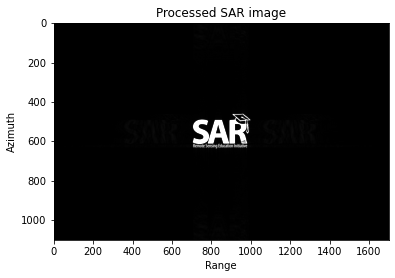

In [53]:
# --------------------------------------------------

# H.) Display SAR image

processed_abs = abs(processed)  # absolute value

fig = plt.figure()
ax6 = fig.add_subplot(111)
cax6 = ax6.imshow(processed_abs, aspect='equal', vmax=max_power, cmap=cm.gray)
ax6.set_title('Processed SAR image')
ax6.set_xlabel('Range')
ax6.set_ylabel('Azimuth')

plt.show()